In [26]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set()

from stepmix.stepmix import StepMix
from IPython.display import Image
from stepmix.utils import get_mixed_descriptor

from sklearn import preprocessing
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# %matplotlib inline

In [27]:
df=pd.read_csv('M1.csv')
df

Unnamed: 0        ID  BirthDate Gender   Location  DisposableIncome  \
0           60376  C5521545    19/7/90      M       PUNE          11379.70   
1           30607  C4524686   15/11/84      M    KOLKATA           4601.15   
2          141322  C5033957   8/1/1991      F    GURGAON          92055.01   
3           14457  C6441168   5/3/1990      M    CHENNAI           1702.03   
4           85365  C4319083    13/8/89      M      NOIDA          20373.19   
...           ...       ...        ...    ...        ...               ...   
19995      106524  C8650267    29/9/86      M  BANGALORE          33182.53   
19996       57799  C1470356  10/9/1982      F  GHAZIABAD          10774.73   
19997       15680  C6436423    19/9/86      M    GURGAON           1925.00   
19998      112125  C3423653  2/10/1988      M  BANGALORE          38264.01   
19999       68058  C5818651    15/8/86      M  HYDERABAD          13553.40   

      ClientSince  SpendingLastMonth  PurchasesLastYear  Recency  Family_Size  \
0       11/9/2016            1066.15                 13       23          3.0   
1         13/8/16             194.00                 10       10          1.0   
2        1/9/2016            1500.00                  8       30          NaN   
3        6/8/2016              62.00                  2        1          2.0   
4         15/8/16             506.00                 22       23          2.0   
...           ...                ...                ...      ...          ...   
19995     27/8/16             290.00                 17       16          NaN   
19996    5/9/2016             600.00                 20       22          2.0   
19997     25/8/16            1000.00                 15       24          2.0   
19998     28/8/16             100.00                 15       13          1.0   
19999     28/8/16             490.00                 22       23          4.0   

      Married GraduateDegree     Profession  
0         Yes            Yes         Lawyer  
1         Yes            Yes         Artist  
2         Yes            Yes  Entertainment  
3          No            Yes     Healthcare  
4         Yes             No         Lawyer  
...       ...            ...            ...  
19995     Yes            Yes     Healthcare  
19996     Yes            Yes         Artist  
19997     Yes             No         Lawyer  
19998      No            Yes         Artist  
19999     Yes            Yes         Lawyer  

[20000 rows x 14 columns]

In [28]:
df.describe()

Unnamed: 0  DisposableIncome  SpendingLastMonth  PurchasesLastYear  \
count   20000.000000      1.996100e+04       20000.000000       20000.000000   
mean    90180.774750      1.434241e+05        1026.055070          15.975550   
std     52312.257213      1.020329e+06        1474.238113           4.729923   
min         1.000000      1.042405e+02           1.000000           1.000000   
25%     44834.250000      7.659250e+03         200.000000          13.000000   
50%     90344.000000      2.278216e+04         500.000000          17.000000   
75%    135651.500000      7.435715e+04        1186.000000          20.000000   
max    180656.000000      8.224463e+07       10088.000000          24.000000   

            Recency   Family_Size  
count  20000.000000  19181.000000  
mean      46.751800      2.840311  
std      104.077519      1.540348  
min        0.000000      1.000000  
25%       15.000000      2.000000  
50%       19.000000      2.000000  
75%       29.000000      4.000000  
max     1038.000000      9.000000

In [29]:
for i in range(len(df['ClientSince'])):
    parts = df['ClientSince'][i].split('/')
    if len(parts[-1]) == 2:
        parts[-1] = str(int(parts[-1]) + 2000)
        df.at[i, 'ClientSince'] = '/'.join(parts)
# Mostrar el DataFrame resultante
df


Unnamed: 0        ID  BirthDate Gender   Location  DisposableIncome  \
0           60376  C5521545    19/7/90      M       PUNE          11379.70   
1           30607  C4524686   15/11/84      M    KOLKATA           4601.15   
2          141322  C5033957   8/1/1991      F    GURGAON          92055.01   
3           14457  C6441168   5/3/1990      M    CHENNAI           1702.03   
4           85365  C4319083    13/8/89      M      NOIDA          20373.19   
...           ...       ...        ...    ...        ...               ...   
19995      106524  C8650267    29/9/86      M  BANGALORE          33182.53   
19996       57799  C1470356  10/9/1982      F  GHAZIABAD          10774.73   
19997       15680  C6436423    19/9/86      M    GURGAON           1925.00   
19998      112125  C3423653  2/10/1988      M  BANGALORE          38264.01   
19999       68058  C5818651    15/8/86      M  HYDERABAD          13553.40   

      ClientSince  SpendingLastMonth  PurchasesLastYear  Recency  Family_Size  \
0       11/9/2016            1066.15                 13       23          3.0   
1       13/8/2016             194.00                 10       10          1.0   
2        1/9/2016            1500.00                  8       30          NaN   
3        6/8/2016              62.00                  2        1          2.0   
4       15/8/2016             506.00                 22       23          2.0   
...           ...                ...                ...      ...          ...   
19995   27/8/2016             290.00                 17       16          NaN   
19996    5/9/2016             600.00                 20       22          2.0   
19997   25/8/2016            1000.00                 15       24          2.0   
19998   28/8/2016             100.00                 15       13          1.0   
19999   28/8/2016             490.00                 22       23          4.0   

      Married GraduateDegree     Profession  
0         Yes            Yes         Lawyer  
1         Yes            Yes         Artist  
2         Yes            Yes  Entertainment  
3          No            Yes     Healthcare  
4         Yes             No         Lawyer  
...       ...            ...            ...  
19995     Yes            Yes     Healthcare  
19996     Yes            Yes         Artist  
19997     Yes             No         Lawyer  
19998      No            Yes         Artist  
19999     Yes            Yes         Lawyer  

[20000 rows x 14 columns]

In [30]:
#se hizo de esta forma ya que los datos como por ejemplo el 1 primero para pyhton no es un str si no que es un float por lo cual no se pudo reutilizar el codigo

def procesar_fecha_nacimiento(fecha_nacimiento):
    if isinstance(fecha_nacimiento, str):
        partes = fecha_nacimiento.split('/')
        if len(partes[-1]) == 2:
            partes[-1] = str(int(partes[-1]) + 1900)
        return '/'.join(partes)
    elif isinstance(fecha_nacimiento, float) and np.isnan(fecha_nacimiento):
        return None
    return fecha_nacimiento

df['BirthDate'] = df['BirthDate'].apply(procesar_fecha_nacimiento)
df = df.dropna(subset=['BirthDate']).reset_index(drop=True)
df

Unnamed: 0        ID   BirthDate Gender   Location  DisposableIncome  \
0           60376  C5521545   19/7/1990      M       PUNE          11379.70   
1           30607  C4524686  15/11/1984      M    KOLKATA           4601.15   
2          141322  C5033957    8/1/1991      F    GURGAON          92055.01   
3           14457  C6441168    5/3/1990      M    CHENNAI           1702.03   
4           85365  C4319083   13/8/1989      M      NOIDA          20373.19   
...           ...       ...         ...    ...        ...               ...   
19941      106524  C8650267   29/9/1986      M  BANGALORE          33182.53   
19942       57799  C1470356   10/9/1982      F  GHAZIABAD          10774.73   
19943       15680  C6436423   19/9/1986      M    GURGAON           1925.00   
19944      112125  C3423653   2/10/1988      M  BANGALORE          38264.01   
19945       68058  C5818651   15/8/1986      M  HYDERABAD          13553.40   

      ClientSince  SpendingLastMonth  PurchasesLastYear  Recency  Family_Size  \
0       11/9/2016            1066.15                 13       23          3.0   
1       13/8/2016             194.00                 10       10          1.0   
2        1/9/2016            1500.00                  8       30          NaN   
3        6/8/2016              62.00                  2        1          2.0   
4       15/8/2016             506.00                 22       23          2.0   
...           ...                ...                ...      ...          ...   
19941   27/8/2016             290.00                 17       16          NaN   
19942    5/9/2016             600.00                 20       22          2.0   
19943   25/8/2016            1000.00                 15       24          2.0   
19944   28/8/2016             100.00                 15       13          1.0   
19945   28/8/2016             490.00                 22       23          4.0   

      Married GraduateDegree     Profession  
0         Yes            Yes         Lawyer  
1         Yes            Yes         Artist  
2         Yes            Yes  Entertainment  
3          No            Yes     Healthcare  
4         Yes             No         Lawyer  
...       ...            ...            ...  
19941     Yes            Yes     Healthcare  
19942     Yes            Yes         Artist  
19943     Yes             No         Lawyer  
19944      No            Yes         Artist  
19945     Yes            Yes         Lawyer  

[19946 rows x 14 columns]

In [31]:
df_ceros = df[(df!=0).all(axis=1)]#Eliminamos todas las filas con valor nulo
df = df_ceros.dropna()#Eliminamos todas las filas en blanco
df.reset_index(inplace=True,drop=True)#Reseteamos el index
df

Unnamed: 0        ID   BirthDate Gender   Location  DisposableIncome  \
0           60376  C5521545   19/7/1990      M       PUNE          11379.70   
1           30607  C4524686  15/11/1984      M    KOLKATA           4601.15   
2           14457  C6441168    5/3/1990      M    CHENNAI           1702.03   
3           85365  C4319083   13/8/1989      M      NOIDA          20373.19   
4           62600  C4317871   24/5/1984      F    GURGAON          11976.56   
...           ...       ...         ...    ...        ...               ...   
18591      154425  C8929369    1/1/1800      F    CHENNAI         161200.00   
18592       57799  C1470356   10/9/1982      F  GHAZIABAD          10774.73   
18593       15680  C6436423   19/9/1986      M    GURGAON           1925.00   
18594      112125  C3423653   2/10/1988      M  BANGALORE          38264.01   
18595       68058  C5818651   15/8/1986      M  HYDERABAD          13553.40   

      ClientSince  SpendingLastMonth  PurchasesLastYear  Recency  Family_Size  \
0       11/9/2016            1066.15                 13       23          3.0   
1       13/8/2016             194.00                 10       10          1.0   
2        6/8/2016              62.00                  2        1          2.0   
3       15/8/2016             506.00                 22       23          2.0   
4       26/8/2016             256.00                 19       18          5.0   
...           ...                ...                ...      ...          ...   
18591   10/8/2016            5000.00                 17      266          3.0   
18592    5/9/2016             600.00                 20       22          2.0   
18593   25/8/2016            1000.00                 15       24          2.0   
18594   28/8/2016             100.00                 15       13          1.0   
18595   28/8/2016             490.00                 22       23          4.0   

      Married GraduateDegree  Profession  
0         Yes            Yes      Lawyer  
1         Yes            Yes      Artist  
2          No            Yes  Healthcare  
3         Yes             No      Lawyer  
4         Yes             No    Engineer  
...       ...            ...         ...  
18591     Yes             No      Artist  
18592     Yes            Yes      Artist  
18593     Yes             No      Lawyer  
18594      No            Yes      Artist  
18595     Yes            Yes      Lawyer  

[18596 rows x 14 columns]

In [32]:
df["edad"]=0
fecha_referencia = datetime.strptime('31/12/2023', '%d/%m/%Y')
for i in range(len(df['BirthDate'])):
    fecha_nacimiento = datetime.strptime(df['BirthDate'][i], '%d/%m/%Y')
    edad=fecha_referencia.year - fecha_nacimiento.year - ((fecha_referencia.month, fecha_referencia.day) < (fecha_nacimiento.month, fecha_nacimiento.day))
    df["edad"][i] = edad

# Mostrar el DataFrame resultante
df

Unnamed: 0        ID   BirthDate Gender   Location  DisposableIncome  \
0           60376  C5521545   19/7/1990      M       PUNE          11379.70   
1           30607  C4524686  15/11/1984      M    KOLKATA           4601.15   
2           14457  C6441168    5/3/1990      M    CHENNAI           1702.03   
3           85365  C4319083   13/8/1989      M      NOIDA          20373.19   
4           62600  C4317871   24/5/1984      F    GURGAON          11976.56   
...           ...       ...         ...    ...        ...               ...   
18591      154425  C8929369    1/1/1800      F    CHENNAI         161200.00   
18592       57799  C1470356   10/9/1982      F  GHAZIABAD          10774.73   
18593       15680  C6436423   19/9/1986      M    GURGAON           1925.00   
18594      112125  C3423653   2/10/1988      M  BANGALORE          38264.01   
18595       68058  C5818651   15/8/1986      M  HYDERABAD          13553.40   

      ClientSince  SpendingLastMonth  PurchasesLastYear  Recency  Family_Size  \
0       11/9/2016            1066.15                 13       23          3.0   
1       13/8/2016             194.00                 10       10          1.0   
2        6/8/2016              62.00                  2        1          2.0   
3       15/8/2016             506.00                 22       23          2.0   
4       26/8/2016             256.00                 19       18          5.0   
...           ...                ...                ...      ...          ...   
18591   10/8/2016            5000.00                 17      266          3.0   
18592    5/9/2016             600.00                 20       22          2.0   
18593   25/8/2016            1000.00                 15       24          2.0   
18594   28/8/2016             100.00                 15       13          1.0   
18595   28/8/2016             490.00                 22       23          4.0   

      Married GraduateDegree  Profession  edad  
0         Yes            Yes      Lawyer    33  
1         Yes            Yes      Artist    39  
2          No            Yes  Healthcare    33  
3         Yes             No      Lawyer    34  
4         Yes             No    Engineer    39  
...       ...            ...         ...   ...  
18591     Yes             No      Artist   223  
18592     Yes            Yes      Artist    41  
18593     Yes             No      Lawyer    37  
18594      No            Yes      Artist    35  
18595     Yes            Yes      Lawyer    37  

[18596 rows x 15 columns]

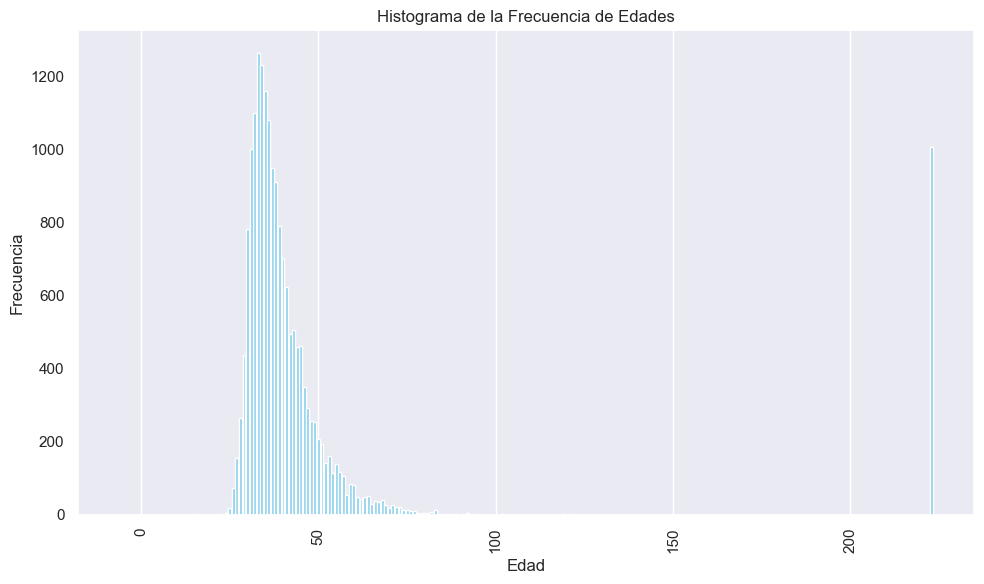

In [33]:

import matplotlib.pyplot as plt

# Contar las frecuencias de cada edad
frecuencia_edad = df['edad'].value_counts()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(frecuencia_edad.index, frecuencia_edad.values, color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Frecuencia de Edades')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si hay muchas edades
plt.grid(axis='y')
plt.tight_layout() #Ajusta automáticamente la disposición del gráfico para que quepa todo el contenido de forma adecuada.

plt.show()

In [34]:
#como podemos ver en el histiograma la mayoria de los datos se enceuntran entre 90 años y 18 años por lo cual vamos a dejar las edades aceptables entre esos valores
# Definir el rango aceptable de edad
edad_minima_aceptable = 18
edad_maxima_aceptable =90

# Filtrar el DataFrame para mantener solo las filas con edades dentro del rango aceptable
df_filtrado = df[(df['edad'] >= edad_minima_aceptable) & (df['edad'] <= edad_maxima_aceptable)]
# Resetear el índice del DataFrame filtrado
df_filtrado = df_filtrado.reset_index(drop=True)
# Sobrescribir el DataFrame original con el DataFrame filtrado
df = df_filtrado.copy()

# Mostrar el DataFrame resultante
df

Unnamed: 0        ID   BirthDate Gender   Location  DisposableIncome  \
0           60376  C5521545   19/7/1990      M       PUNE          11379.70   
1           30607  C4524686  15/11/1984      M    KOLKATA           4601.15   
2           14457  C6441168    5/3/1990      M    CHENNAI           1702.03   
3           85365  C4319083   13/8/1989      M      NOIDA          20373.19   
4           62600  C4317871   24/5/1984      F    GURGAON          11976.56   
...           ...       ...         ...    ...        ...               ...   
17569      133832  C8137950    5/6/1986      F  GHAZIABAD          71077.31   
17570       57799  C1470356   10/9/1982      F  GHAZIABAD          10774.73   
17571       15680  C6436423   19/9/1986      M    GURGAON           1925.00   
17572      112125  C3423653   2/10/1988      M  BANGALORE          38264.01   
17573       68058  C5818651   15/8/1986      M  HYDERABAD          13553.40   

      ClientSince  SpendingLastMonth  PurchasesLastYear  Recency  Family_Size  \
0       11/9/2016            1066.15                 13       23          3.0   
1       13/8/2016             194.00                 10       10          1.0   
2        6/8/2016              62.00                  2        1          2.0   
3       15/8/2016             506.00                 22       23          2.0   
4       26/8/2016             256.00                 19       18          5.0   
...           ...                ...                ...      ...          ...   
17569    3/9/2016            5281.00                 19      296          2.0   
17570    5/9/2016             600.00                 20       22          2.0   
17571   25/8/2016            1000.00                 15       24          2.0   
17572   28/8/2016             100.00                 15       13          1.0   
17573   28/8/2016             490.00                 22       23          4.0   

      Married GraduateDegree     Profession  edad  
0         Yes            Yes         Lawyer    33  
1         Yes            Yes         Artist    39  
2          No            Yes     Healthcare    33  
3         Yes             No         Lawyer    34  
4         Yes             No       Engineer    39  
...       ...            ...            ...   ...  
17569     Yes            Yes  Entertainment    37  
17570     Yes            Yes         Artist    41  
17571     Yes             No         Lawyer    37  
17572      No            Yes         Artist    35  
17573     Yes            Yes         Lawyer    37  

[17574 rows x 15 columns]

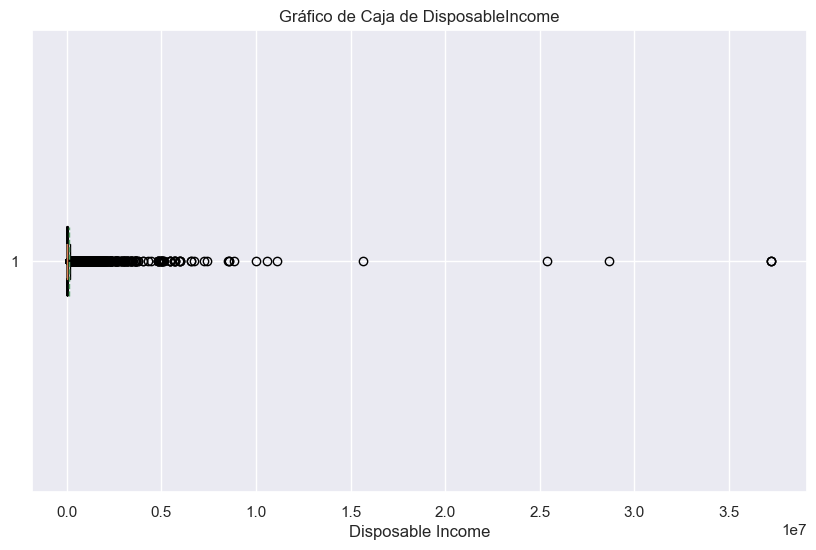

In [35]:
# Crear el gráfico de caja
plt.figure(figsize=(10, 6))
plt.boxplot(df['DisposableIncome'], vert=False, patch_artist=True, notch=True, meanline=True, showmeans=True)
plt.title('Gráfico de Caja de DisposableIncome')
plt.xlabel('Disposable Income')
plt.grid(True)
plt.show()

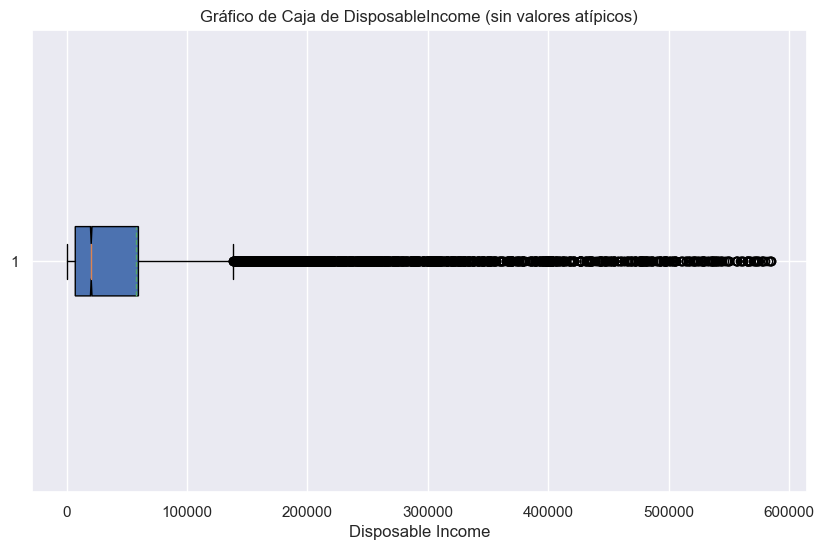

In [36]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['DisposableIncome'].quantile(0.0)
Q3 = df['DisposableIncome'].quantile(0.9)
IQR = Q3 - Q1

# Definir los límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
df_filtered = df[(df['DisposableIncome'] >= lower_bound) & (df['DisposableIncome'] <= upper_bound)]

# Restablecer los índices del DataFrame filtrado
df_filtered.reset_index(drop=True, inplace=True)

# Asignar el DataFrame filtrado de vuelta al original
df = df_filtered

# Crear el gráfico de caja sin valores atípicos
plt.figure(figsize=(10, 6))
plt.boxplot(df['DisposableIncome'], vert=False, patch_artist=True, notch=True, meanline=True, showmeans=True)
plt.title('Gráfico de Caja de DisposableIncome (sin valores atípicos)')
plt.xlabel('Disposable Income')
plt.grid(True)
plt.show()


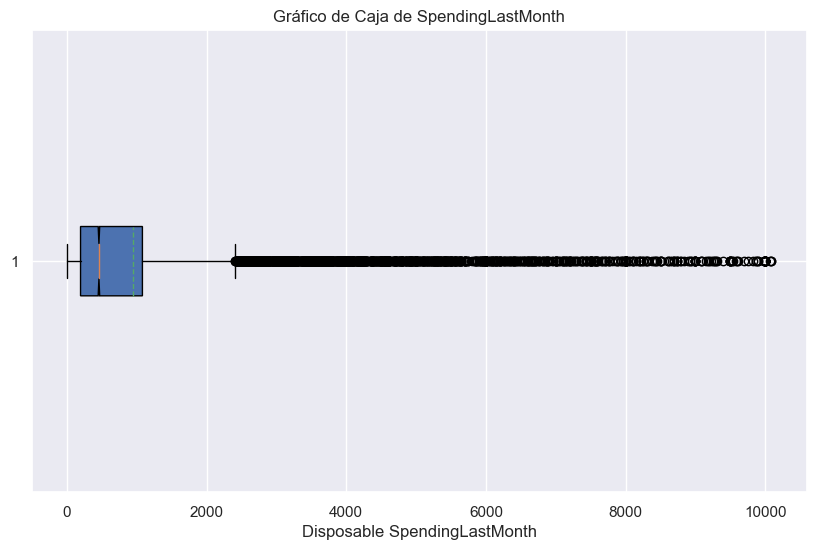

In [37]:
# Crear el gráfico de caja
plt.figure(figsize=(10, 6))
plt.boxplot(df['SpendingLastMonth'], vert=False, patch_artist=True, notch=True, meanline=True, showmeans=True)
plt.title('Gráfico de Caja de SpendingLastMonth')
plt.xlabel('Disposable SpendingLastMonth')
plt.grid(True)
plt.show()

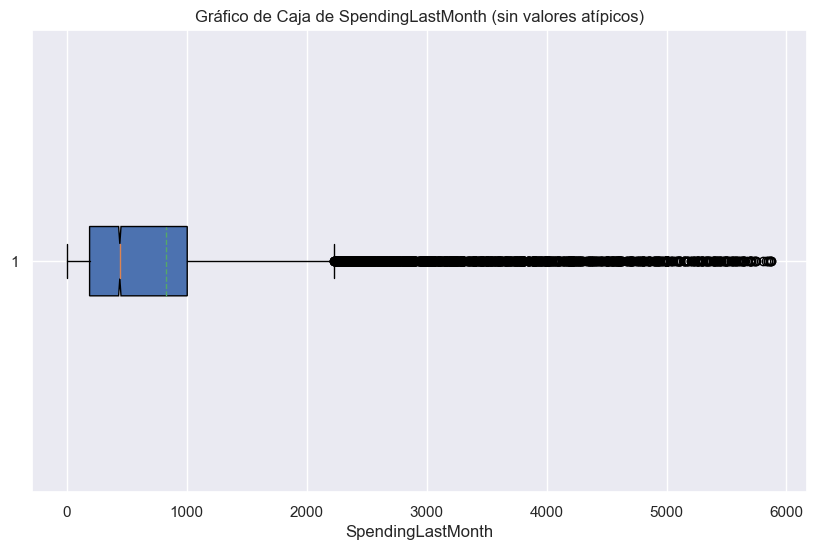

In [38]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['SpendingLastMonth'].quantile(0.0)
Q3 = df['SpendingLastMonth'].quantile(0.9)
IQR = Q3 - Q1

# Definir los límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
df_filtered = df[(df['SpendingLastMonth'] >= lower_bound) & (df['SpendingLastMonth'] <= upper_bound)]

# Restablecer los índices del DataFrame filtrado
df_filtered.reset_index(drop=True, inplace=True)

# Asignar el DataFrame filtrado de vuelta al original
df = df_filtered

# Crear el gráfico de caja sin valores atípicos
plt.figure(figsize=(10, 6))
plt.boxplot(df['SpendingLastMonth'], vert=False, patch_artist=True, notch=True, meanline=True, showmeans=True)
plt.title('Gráfico de Caja de SpendingLastMonth (sin valores atípicos)')
plt.xlabel('SpendingLastMonth')
plt.grid(True)
plt.show()

In [39]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#df[['Family_Size', 'SpendingLastMonth', 'DisposableIncome', 'edad']] = scaler.fit_transform(df[['Family_Size', 'SpendingLastMonth', 'DisposableIncome', 'edad']])

In [40]:

# Generar la secuencia de 1 a 9
secuencia = [i for i in range(9, 0, -1)]

# Obtener la frecuencia de cada profesión
frecuencia_profesion = df["Profession"].value_counts()

# Obtener la lista de profesiones más frecuentes
lista_profesiones_mas_frecuentes = frecuencia_profesion.index.tolist()
categoria_profesiones=dict(zip(lista_profesiones_mas_frecuentes,secuencia))
print(categoria_profesiones)
df['Categoria_Profesion'] = df['Profession'].map(categoria_profesiones)
df['Categoria_Profesion'] = df['Categoria_Profesion'].fillna(0).astype(int)


{'Artist': 9, 'Healthcare': 8, 'Entertainment': 7, 'Doctor': 6, 'Engineer': 5, 'Lawyer': 4, 'Executive': 3, 'Marketing': 2, 'Homemaker': 1}


In [41]:
# Generar la secuencia de 1 a 9
secuencia = [i for i in range(11, 0, -1)]

# Obtener la frecuencia de cada profesión
frecuencia_location = df["Location"].value_counts()

# Obtener la lista de profesiones más frecuentes
lista_location_mas_frecuentes = frecuencia_location.index.tolist()
categoria_location=dict(zip(lista_location_mas_frecuentes,secuencia))

df['Categoria_location'] = df['Location'].map(categoria_location)
df['Categoria_location'] = df['Categoria_location'].fillna(0).astype(int)

In [42]:
#categorizacion variables binarias
df["GraduateDegree"]=df["GraduateDegree"].map({'Yes':1,'No':0})
df["Married"]=df["Married"].map({'Yes':1,'No':0})
df["Gender"]=df["Gender"].map({'F':1,'M':0})
df


Unnamed: 0        ID   BirthDate  Gender   Location  DisposableIncome  \
0           60376  C5521545   19/7/1990       0       PUNE          11379.70   
1           30607  C4524686  15/11/1984       0    KOLKATA           4601.15   
2           14457  C6441168    5/3/1990       0    CHENNAI           1702.03   
3           85365  C4319083   13/8/1989       0      NOIDA          20373.19   
4           62600  C4317871   24/5/1984       1    GURGAON          11976.56   
...           ...       ...         ...     ...        ...               ...   
16558      133832  C8137950    5/6/1986       1  GHAZIABAD          71077.31   
16559       57799  C1470356   10/9/1982       1  GHAZIABAD          10774.73   
16560       15680  C6436423   19/9/1986       0    GURGAON           1925.00   
16561      112125  C3423653   2/10/1988       0  BANGALORE          38264.01   
16562       68058  C5818651   15/8/1986       0  HYDERABAD          13553.40   

      ClientSince  SpendingLastMonth  PurchasesLastYear  Recency  Family_Size  \
0       11/9/2016            1066.15                 13       23          3.0   
1       13/8/2016             194.00                 10       10          1.0   
2        6/8/2016              62.00                  2        1          2.0   
3       15/8/2016             506.00                 22       23          2.0   
4       26/8/2016             256.00                 19       18          5.0   
...           ...                ...                ...      ...          ...   
16558    3/9/2016            5281.00                 19      296          2.0   
16559    5/9/2016             600.00                 20       22          2.0   
16560   25/8/2016            1000.00                 15       24          2.0   
16561   28/8/2016             100.00                 15       13          1.0   
16562   28/8/2016             490.00                 22       23          4.0   

       Married  GraduateDegree     Profession  edad  Categoria_Profesion  \
0            1               1         Lawyer    33                    4   
1            1               1         Artist    39                    9   
2            0               1     Healthcare    33                    8   
3            1               0         Lawyer    34                    4   
4            1               0       Engineer    39                    5   
...        ...             ...            ...   ...                  ...   
16558        1               1  Entertainment    37                    7   
16559        1               1         Artist    41                    9   
16560        1               0         Lawyer    37                    4   
16561        0               1         Artist    35                    9   
16562        1               1         Lawyer    37                    4   

       Categoria_location  
0                       7  
1                       4  
2                       8  
3                       5  
4                      10  
...                   ...  
16558                   2  
16559                   2  
16560                  10  
16561                   9  
16562                   1  

[16563 rows x 17 columns]

In [43]:
columnas_a_borrar =["ID","Unnamed: 0"]

# Usas el método drop para eliminar esas columnas
df = df.drop(columnas_a_borrar, axis=1)
df

BirthDate  Gender   Location  DisposableIncome ClientSince  \
0       19/7/1990       0       PUNE          11379.70   11/9/2016   
1      15/11/1984       0    KOLKATA           4601.15   13/8/2016   
2        5/3/1990       0    CHENNAI           1702.03    6/8/2016   
3       13/8/1989       0      NOIDA          20373.19   15/8/2016   
4       24/5/1984       1    GURGAON          11976.56   26/8/2016   
...           ...     ...        ...               ...         ...   
16558    5/6/1986       1  GHAZIABAD          71077.31    3/9/2016   
16559   10/9/1982       1  GHAZIABAD          10774.73    5/9/2016   
16560   19/9/1986       0    GURGAON           1925.00   25/8/2016   
16561   2/10/1988       0  BANGALORE          38264.01   28/8/2016   
16562   15/8/1986       0  HYDERABAD          13553.40   28/8/2016   

       SpendingLastMonth  PurchasesLastYear  Recency  Family_Size  Married  \
0                1066.15                 13       23          3.0        1   
1                 194.00                 10       10          1.0        1   
2                  62.00                  2        1          2.0        0   
3                 506.00                 22       23          2.0        1   
4                 256.00                 19       18          5.0        1   
...                  ...                ...      ...          ...      ...   
16558            5281.00                 19      296          2.0        1   
16559             600.00                 20       22          2.0        1   
16560            1000.00                 15       24          2.0        1   
16561             100.00                 15       13          1.0        0   
16562             490.00                 22       23          4.0        1   

       GraduateDegree     Profession  edad  Categoria_Profesion  \
0                   1         Lawyer    33                    4   
1                   1         Artist    39                    9   
2                   1     Healthcare    33                    8   
3                   0         Lawyer    34                    4   
4                   0       Engineer    39                    5   
...               ...            ...   ...                  ...   
16558               1  Entertainment    37                    7   
16559               1         Artist    41                    9   
16560               0         Lawyer    37                    4   
16561               1         Artist    35                    9   
16562               1         Lawyer    37                    4   

       Categoria_location  
0                       7  
1                       4  
2                       8  
3                       5  
4                      10  
...                   ...  
16558                   2  
16559                   2  
16560                  10  
16561                   9  
16562                   1  

[16563 rows x 15 columns]

In [44]:
#se agregupa todas las variables binarias en un solo dataframe

df_GraduateDegree= df.iloc[:,10]
df_Gender= df.iloc[:,1]
df_Marrid=df.iloc[:,9]

columnas_deseadas_categorizar= [13,14]

df_categoricas = df.iloc[:,columnas_deseadas_categorizar]
bn = pd.get_dummies(df_categoricas,columns=[ 'Categoria_Profesion','Categoria_location'])

df_categoricas_binarias= pd.concat([bn,df_GraduateDegree,df_Gender,df_Marrid], axis=1)
df_categoricas_binarias


Categoria_Profesion_1  Categoria_Profesion_2  Categoria_Profesion_3  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   
...                      ...                    ...                    ...   
16558                      0                      0                      0   
16559                      0                      0                      0   
16560                      0                      0                      0   
16561                      0                      0                      0   
16562                      0                      0                      0   

       Categoria_Profesion_4  Categoria_Profesion_5  Categoria_Profesion_6  \
0                          1                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          1                      0                      0   
4                          0                      1                      0   
...                      ...                    ...                    ...   
16558                      0                      0                      0   
16559                      0                      0                      0   
16560                      1                      0                      0   
16561                      0                      0                      0   
16562                      1                      0                      0   

       Categoria_Profesion_7  Categoria_Profesion_8  Categoria_Profesion_9  \
0                          0                      0                      0   
1                          0                      0                      1   
2                          0                      1                      0   
3                          0                      0                      0   
4                          0                      0                      0   
...                      ...                    ...                    ...   
16558                      1                      0                      0   
16559                      0                      0                      1   
16560                      0                      0                      0   
16561                      0                      0                      1   
16562                      0                      0                      0   

       Categoria_location_1  ...  Categoria_location_5  Categoria_location_6  \
0                         0  ...                     0                     0   
1                         0  ...                     0                     0   
2                         0  ...                     0                     0   
3                         0  ...                     1                     0   
4                         0  ...                     0                     0   
...                     ...  ...                   ...                   ...   
16558                     0  ...                     0                     0   
16559                     0  ...                     0                     0   
16560                     0  ...                     0                     0   
16561                     0  ...                     0                     0   
16562                     1  ...                     0                     0   

       Categoria_location_7  Categoria_location_8  Categoria_location_9  \
0                         1                     0                     0   
1                         0                     0                     0   
2         

In [45]:
#aqui se creo una df aparte en los que se normaliza solo las variables continuas
X=df[['DisposableIncome','edad','Family_Size']] 
X_norm =(X-X.mean())/X.std()
df_norm=pd.concat([X_norm, df_categoricas_binarias], axis=1)
df_norm

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto').fit(df_norm)
# Predicción de etiquetas
labels_kmeans = kmeans.predict(df_norm)
print("Etiquetas de K-Means:", labels_kmeans)

Etiquetas de K-Means: [0 0 0 ... 0 0 1]


<Axes: >

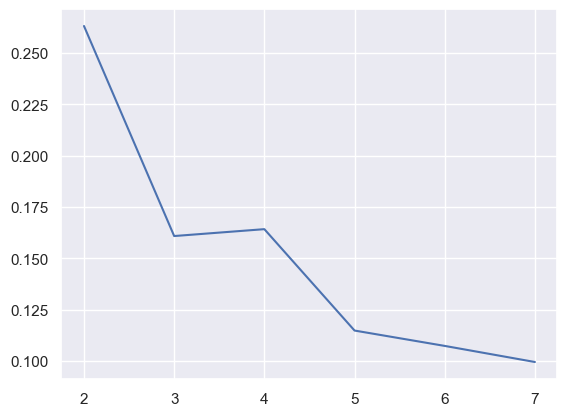

In [46]:
from sklearn.metrics import silhouette_score
#hay un valor optimo de claouseter,esta funcion hace eso,define el numero de clauster que hay que ocupar
K = range(2, 8)
fits = []
score = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(df_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(df_norm, model.labels_, metric='euclidean'))
    
sns.lineplot(x = K, y = score)   

In [47]:
#latent class using Stepmix,aqui basicamente se categoriza las variables,gaussiana significa que sean continuas,las variables no categorizadas se van a elminar

from stepmix.utils import get_mixed_descriptor

# Unspecified variables are simply not included in mixed_data
mixed_data, mixed_descriptor = get_mixed_descriptor(
    dataframe=df,
    binary=['GraduateDegree','Gender','Married'],
    categorical=['Categoria_location','Categoria_Profesion'],
    continuous=['DisposableIncome','edad','Family_Size']
)
mixed_data

GraduateDegree  Gender  Married  Categoria_location  \
0                   1       0        1                   7   
1                   1       0        1                   4   
2                   1       0        0                   8   
3                   0       0        1                   5   
4                   0       1        1                  10   
...               ...     ...      ...                 ...   
16558               1       1        1                   2   
16559               1       1        1                   2   
16560               0       0        1                  10   
16561               1       0        0                   9   
16562               1       0        1                   1   

       Categoria_Profesion  DisposableIncome  edad  Family_Size  
0                        4          11379.70    33          3.0  
1                        9           4601.15    39          1.0  
2                        8           1702.03    33          2.0  
3                        4          20373.19    34          2.0  
4                        5          11976.56    39          5.0  
...                    ...               ...   ...          ...  
16558                    7          71077.31    37          2.0  
16559                    9          10774.73    41          2.0  
16560                    4           1925.00    37          2.0  
16561                    9          38264.01    35          1.0  
16562                    4          13553.40    37          4.0  

[16563 rows x 8 columns]

Fitting StepMix...


Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.19it/s, max_LL=-3.9e+5, max_avg_LL=-23.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.08it/s, max_LL=-3.87e+5, max_avg_LL=-23.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.83s/it, max_LL=-3.85e+5, max_avg_LL=-23.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.21s/it, max_LL=-3.85e+5, max_avg_LL=-23.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.37s/it, max_LL=-3.83e+5, max_avg_LL=-23.1]


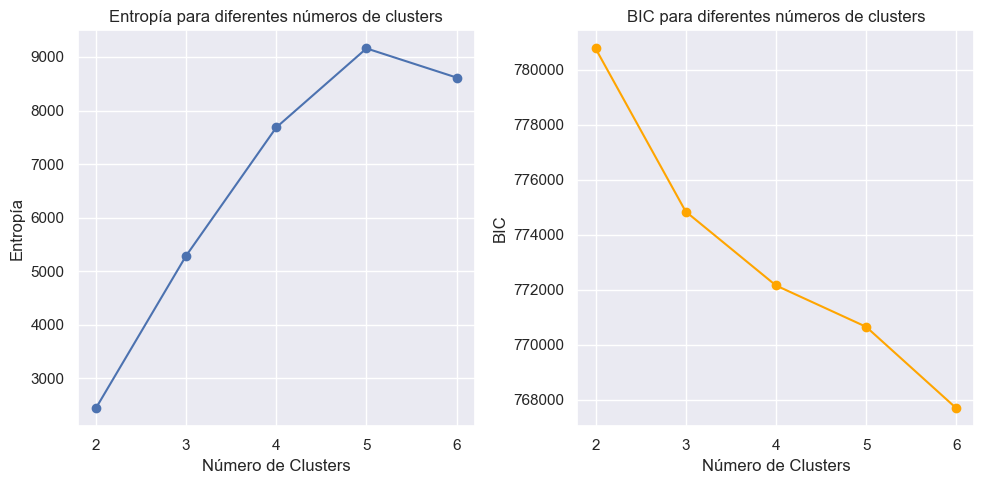

In [48]:
import numpy as np
import pandas as pd
from stepmix import StepMix
from stepmix.utils import get_mixed_descriptor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Supongamos que tienes tus datos en mixed_data y la función descriptor en mixed_descriptor

# Definir el rango de posibles números de clusters
num_clusters = range(2, 7)

# Listas para almacenar los valores de la entropía, BIC y Scaled Relative Entropy
entropy_scores = []
bic_scores = []


# Entrenar el modelo para cada número de clusters y guardar la entropía, BIC y Scaled Relative Entropy
for k in num_clusters:
    model = StepMix(n_components=k, measurement=mixed_descriptor, random_state=0)
    model.fit(mixed_data)
    
    # Calcular las probabilidades asignadas por el modelo
    
    # Calcular la entropía proporcionada por el modelo
    entropy = model.entropy(mixed_data)
    entropy_scores.append(entropy)
    
    # Calcular el BIC
    bic = model.bic(mixed_data)
    bic_scores.append(bic)
    

# Visualizar la Entropía, el BIC y el Scaled Relative Entropy para diferentes números de clusters
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(num_clusters, entropy_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Entropía')
plt.title('Entropía para diferentes números de clusters')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(num_clusters, bic_scores, marker='o', color='orange')
plt.xlabel('Número de Clusters')
plt.ylabel('BIC')
plt.title('BIC para diferentes números de clusters')
plt.grid(True)



plt.tight_layout()
plt.show()


In [49]:
# Pass descriptor to StepMix and fit model
model = StepMix(n_components=4, measurement=mixed_descriptor, verbose=1, random_state=0)

# Fit model
model.fit(mixed_data)
#
labels_stepmix = model.predict(mixed_data)
print("Etiquetas de StepMix:", labels_stepmix)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.96s/it, max_LL=-3.85e+5, max_avg_LL=-23.3]

MODEL REPORT
    Measurement model parameters
          model_name            binary                        
          class_no                   0       1       2       3
          param variable                                      
          pis   Gender          0.3550  0.2526  0.3336  0.2815
                GraduateDegree  0.6023  0.6548  0.6271  0.6208
                Married         0.5351  0.6083  0.5976  0.5900


          model_name                  categorical                        
          class_no                              0       1       2       3
          param variable                                                 
          pis   Categoria_Profesion_1      0.0321  0.0298  0.0331  0.0322
                Categoria_Profesion_2      0.0405  0.0333  0.0257  0.0384
                Categoria_Profesion_3      0.0704  0.0755  0.0800  0.0757
                Categoria_Profesion_4      0.0691  0.0895  0.0832  0.0768
                Categoria_Profesion_5      0.0916  0.086

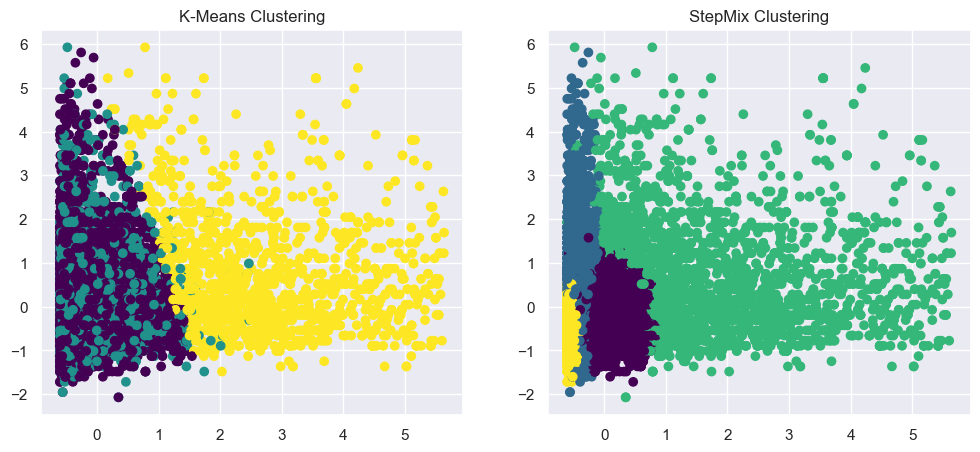

In [50]:
import matplotlib.pyplot as plt

# Visualización de resultados K-Means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_norm.iloc[:, 0], df_norm.iloc[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering')

# Visualización de resultados StepMix
plt.subplot(1, 2, 2)
plt.scatter(df_norm.iloc[:, 0], df_norm.iloc[:, 1], c=labels_stepmix, cmap='viridis')
plt.title('StepMix Clustering')
# Predicción de etiquetas
plt.show()


In [51]:
df['mixed_pred'] = model.predict(mixed_data)


<Axes: xlabel='DisposableIncome', ylabel='edad'>

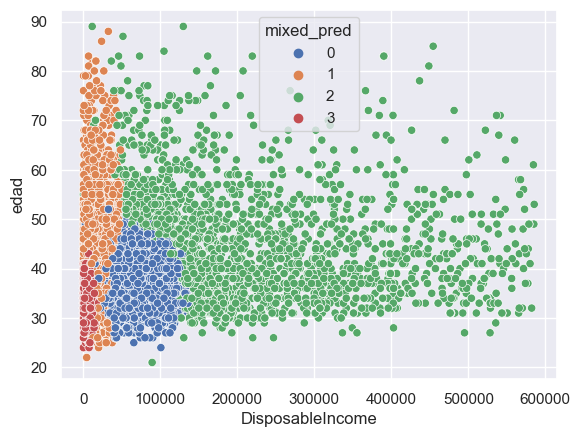

In [52]:

sns.scatterplot(data=df, x='DisposableIncome', y='edad', hue='mixed_pred',palette="deep")

In [53]:
#RFM Segmentation
RFM = df[['SpendingLastMonth','Recency','PurchasesLastYear']]

# Pass descriptor to StepMix and fit model
model = StepMix(n_components=4, measurement='continuous', verbose=1, random_state=0)

# Fit model
model.fit(RFM)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.14it/s, max_LL=-2.32e+5, max_avg_LL=-14]

MODEL REPORT
    Measurement model parameters
          model_name                    gaussian_diag                                     
          class_no                                  0           1            2           3
          param       variable                                                            
          covariances PurchasesLastYear       18.3137     24.9997      16.8468     16.9746
                      Recency               5307.4396     20.1706     141.8148     18.2513
                      SpendingLastMonth   875345.1258  24390.9670  113722.3018  63806.0576
          means       PurchasesLastYear       16.5054     15.2074      17.0944     17.1730
                      Recency                154.3017     14.5394      46.6293     22.5883
                      SpendingLastMonth     3613.8101    222.4031    1731.4209    798.5817
    Class weights
        Class 1 : 0.08
        Class 2 : 0.55
        Class 3 : 0.12
        Class 4 : 0.25
    Fit for 4 latent clas

StepMix(measurement='continuous', n_components=4, random_state=0, verbose=1)

In [54]:
df['RFM_pred'] = model.predict(RFM)
pd.pivot_table(df, values='SpendingLastMonth', index='mixed_pred', columns='RFM_pred', aggfunc='count')

RFM_pred      0     1    2     3
mixed_pred                      
0           345  1894  568  1055
1           328  2208  482  1081
2           357   961  497   705
3           297  4150  484  1151